In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asl-dataset/asl_dataset/n/hand2_n_dif_seg_3_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand1_n_left_seg_5_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand2_n_top_seg_4_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand1_n_dif_seg_2_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand2_n_top_seg_1_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand3_n_dif_seg_1_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand2_n_dif_seg_2_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand2_n_top_seg_3_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand5_n_dif_seg_4_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand1_n_right_seg_5_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand1_n_left_seg_1_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand2_n_right_seg_4_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand1_n_right_seg_3_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand4_n_bot_seg_2_cropped.jpe

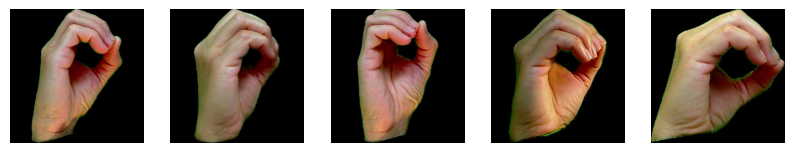

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

# Define dataset path
dataset_path = "/kaggle/input/asl-dataset/asl_dataset"

# Get class folders
class_names = sorted(os.listdir(dataset_path))  # ['0', '1', '2', ..., 'A', 'B', ...]

# Check sample images from a class
sample_class = class_names[0]  # Example: '0'
sample_images_path = os.path.join(dataset_path, sample_class)

# Read and display some images
sample_images = os.listdir(sample_images_path)[:5]  # First 5 images

plt.figure(figsize=(10,5))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(sample_images_path, img_name)
    img = cv2.imread(img_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis("off")
plt.show()


In [7]:
def load_data(dataset_path):
    images = []
    labels = []
    
    for label in sorted(os.listdir(dataset_path)):  # Loop through class folders
        class_folder = os.path.join(dataset_path, label)
        
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            img = cv2.imread(img_path)
            
            if img is None:
                print(f"Skipping corrupted image: {img_path}")
                continue
            
            img = cv2.resize(img, (64, 64))  # Resize to 64x64
            img = img / 255.0  # Normalize pixel values
            
            images.append(img)
            labels.append(label)  # Keep the label as a string (no int conversion)

    return np.array(images), np.array(labels)

X, y = load_data(dataset_path)
print("Dataset Loaded. Shape:", X.shape, y.shape)


Skipping corrupted image: /kaggle/input/asl-dataset/asl_dataset/asl_dataset/n
Skipping corrupted image: /kaggle/input/asl-dataset/asl_dataset/asl_dataset/7
Skipping corrupted image: /kaggle/input/asl-dataset/asl_dataset/asl_dataset/r
Skipping corrupted image: /kaggle/input/asl-dataset/asl_dataset/asl_dataset/2
Skipping corrupted image: /kaggle/input/asl-dataset/asl_dataset/asl_dataset/b
Skipping corrupted image: /kaggle/input/asl-dataset/asl_dataset/asl_dataset/i
Skipping corrupted image: /kaggle/input/asl-dataset/asl_dataset/asl_dataset/f
Skipping corrupted image: /kaggle/input/asl-dataset/asl_dataset/asl_dataset/h
Skipping corrupted image: /kaggle/input/asl-dataset/asl_dataset/asl_dataset/5
Skipping corrupted image: /kaggle/input/asl-dataset/asl_dataset/asl_dataset/e
Skipping corrupted image: /kaggle/input/asl-dataset/asl_dataset/asl_dataset/u
Skipping corrupted image: /kaggle/input/asl-dataset/asl_dataset/asl_dataset/m
Skipping corrupted image: /kaggle/input/asl-dataset/asl_dataset/

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (2012, 64, 64, 3) (2012,)
Testing data shape: (503, 64, 64, 3) (503,)


In [9]:
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Fit & transform training labels
y_test_encoded = label_encoder.transform(y_test)  # Transform test labels

# Get the mapping of classes
class_names = label_encoder.classes_  # List of classes
print("Class Mapping:", {i: class_names[i] for i in range(len(class_names))})

# Check shape after encoding
print("Encoded Training Labels Shape:", y_train_encoded.shape)
print("Encoded Testing Labels Shape:", y_test_encoded.shape)


Class Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f', 16: 'g', 17: 'h', 18: 'i', 19: 'j', 20: 'k', 21: 'l', 22: 'm', 23: 'n', 24: 'o', 25: 'p', 26: 'q', 27: 'r', 28: 's', 29: 't', 30: 'u', 31: 'v', 32: 'w', 33: 'x', 34: 'y', 35: 'z'}
Encoded Training Labels Shape: (2012,)
Encoded Testing Labels Shape: (503,)


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a simple CNN model
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Prevent overfitting
        layers.Dense(len(class_names), activation='softmax')  # Output layer
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
cnn_model = build_cnn_model()
cnn_model.summary()  # Show model architecture


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 687,844 (2.62 MB)

 Trainable params: 687,844 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = cnn_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=20,
    batch_size=32
)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.9409 - loss: 0.1390 - val_accuracy: 0.9503 - val_loss: 0.1810
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.9529 - loss: 0.1226 - val_accuracy: 0.9543 - val_loss: 0.1991
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.9455 - loss: 0.1524 - val_accuracy: 0.9483 - val_loss: 0.1766
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.9532 - loss: 0.1348 - val_accuracy: 0.9523 - val_loss: 0.1768
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.9509 - loss: 0.1271 - val_accuracy: 0.9563 - val_loss: 0.1661
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.9718 - loss: 0.0890 - val_accuracy: 0.9423 - val_loss: 0.1989
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9717 - loss: 0.0678 - val_accuracy: 0.9563 - val_loss: 0.1901
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.9649 - loss: 0.0910 - val_accuracy: 0

In [13]:
test_loss, test_acc = cnn_model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_acc:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9656 - loss: 0.1446
Test Accuracy: 0.96
